In [1]:
import pandas as pd

In [2]:
extranjeros = pd.read_csv("data/viajeros_extranjeros.csv")

In [3]:
nacionales = pd.read_csv("data/viajeros_nacionales.csv")

In [4]:
pernoctaciones = pd.read_csv("data/viajeros_pernoctaciones_estancia.csv")

In [5]:
extranjeros.drop('Unnamed: 0', axis=1, inplace=True)
nacionales.drop('Unnamed: 0', axis=1, inplace=True)
pernoctaciones.drop('Unnamed: 0', axis=1, inplace=True)

### KPI 

2022 - 2024
* viajeros
* pernoctaciones
* estancia media

In [6]:
pernoctaciones_22_24 = pernoctaciones[pernoctaciones.year.isin([2022, 2023, 2024])]

In [7]:
kpi_viajeros = pernoctaciones_22_24.groupby(by='year').agg({
    "viajeros_total" : "sum",
    "pernoc_total" : "sum",
    "estancia_media_total" : "mean"
    })

In [8]:
kpi_viajeros.to_csv("data/summaries/kpi_viajeros_pernocationes_estancia_2022_2024.csv")

### pernoctaciones media mensual - España

In [9]:
columns = ['viajeros_total', 'viajeros_esp', 'viajeros_ext', 
           'pernoc_total', 'pernoc_esp', 'pernoc_ext', 
           'estancia_media_total', 'estancia_media_esp', 'estancia_media_ext']

pernoctaciones_espanya_media_mensual = pernoctaciones.groupby(by="month")[columns].mean().reset_index()

### pernoctaciones total anual - España

In [10]:
# pernoctaciones.info()

In [11]:
pernoctaciones_espanya_total_anual = pernoctaciones.groupby(by='year')['pernoc_total'].sum().reset_index()

In [12]:
# pernoctaciones_espanya_total_anual.plot.line()

### pernoctaciones por fecha - España

In [13]:
pernoctaciones_totales = pernoctaciones[['iso_date', 'viajeros_total', 'pernoc_total', 'estancia_media_total']]

In [14]:
pernoc_espanya_por_fecha = pernoctaciones_totales.groupby(by="iso_date").agg({
    'viajeros_total':'sum',
    'pernoc_total':'sum',
    'estancia_media_total':'mean'
}).reset_index()

In [15]:
pernoc_espanya_por_fecha

,iso_date,viajeros_total,pernoc_total,estancia_media_total
0,2017-01-01,2292273,5147607,2.463325
1,2017-02-01,2604301,5945256,2.466576
2,2017-03-01,3259584,8199455,2.721859
3,2017-04-01,4229618,12146239,2.926875
4,2017-05-01,5140287,16967220,2.964515
...,...,...,...,...
91,2024-08-01,6525412,24398356,3.263586
92,2024-09-01,5891654,20580037,3.134554
93,2024-10-01,5482225,17465589,2.946643
94,2024-11-01,3241974,7488212,2.462562


In [16]:
pernoc_espanya_por_fecha[['iso_date', 'pernoc_total', 'viajeros_total', 'estancia_media_total']].to_csv("data/summaries/pernoctaciones_totales_espanya_por_fecha.csv")

<Axes: >

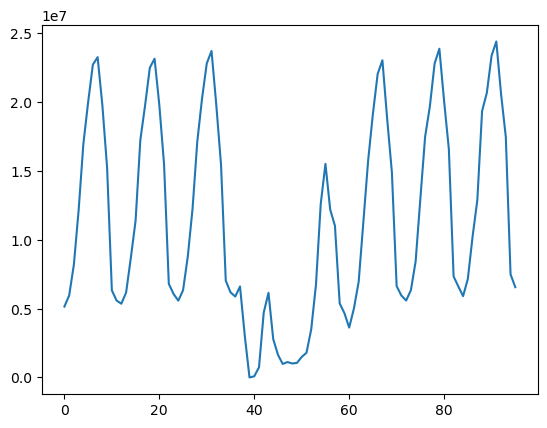

In [17]:
pernoc_espanya_por_fecha.pernoc_total.plot.line()

### pernoctaciones por fecha - Provincias (2022-2024)

In [18]:
pernoctaciones_22_24 = pernoctaciones[pernoctaciones.year.isin([2022, 2023, 2024])]

In [19]:
# Assuming pernoctaciones_22_24 is your DataFrame
crosstab_pernoctaciones_fecha_provincia = pd.crosstab(
    index=pernoctaciones_22_24['iso_date'],
    columns=pernoctaciones_22_24['provincia'],
    values=pernoctaciones_22_24['pernoc_total'],
    aggfunc='mean',  # Use 'sum' to aggregate values; change as needed
    dropna=False    # Optionally include NaN values
)

In [20]:
crosstab_pernoctaciones_fecha_provincia.to_csv("data/summaries/crosstab_pernoctaciones_fecha_provincia_22_24.csv")

In [21]:
crosstab_pernoctaciones_fecha_provincia

provincia,"07 Balears, Illes",08 Barcelona,17 Girona,28 Madrid,29 Málaga,41 Sevilla,46 Valencia/València
iso_date,,,,,,,
2022-01-01,127429.0,996160.0,204903.0,1193236.0,487481.0,320109.0,294104.0
2022-02-01,310405.0,1394900.0,271749.0,1435535.0,783064.0,422782.0,393551.0
2022-03-01,817111.0,1889303.0,317741.0,1720481.0,1153222.0,530313.0,524256.0
2022-04-01,2816016.0,2532973.0,825358.0,2004575.0,1815329.0,629722.0,718645.0
2022-05-01,6377225.0,2917788.0,980345.0,2052491.0,2025618.0,657845.0,759457.0
2022-06-01,8956158.0,3209021.0,1385761.0,2029532.0,2161308.0,611078.0,794544.0
2022-07-01,10386341.0,3679867.0,2068066.0,1922656.0,2529662.0,502287.0,948459.0
2022-08-01,10779452.0,3874913.0,2360768.0,1701671.0,2672820.0,617433.0,1028520.0
2022-09-01,8678063.0,3078699.0,1377674.0,2066264.0,2155199.0,635577.0,807766.0


### pernoctaciones media mensual - Provincias

In [22]:
pernoctaciones.provincia.value_counts()

provincia
29 Málaga               96
41 Sevilla              96
07 Balears, Illes       96
08 Barcelona            96
17 Girona               96
46 Valencia/València    96
28 Madrid               96
Name: count, dtype: int64

In [23]:
pernoctaciones_malaga = pernoctaciones[pernoctaciones.provincia == "29 Málaga"]
pernoctaciones_sevilla = pernoctaciones[pernoctaciones.provincia == "41 Sevilla"]
pernoctaciones_balears = pernoctaciones[pernoctaciones.provincia == "07 Balears, Illes"]
pernoctaciones_barcelona = pernoctaciones[pernoctaciones.provincia == "08 Barcelona"]
pernoctaciones_girona = pernoctaciones[pernoctaciones.provincia == "17 Girona"]
pernoctaciones_valencia = pernoctaciones[pernoctaciones.provincia == "46 Valencia,València"]
pernoctaciones_madrid = pernoctaciones[pernoctaciones.provincia == "28 Madrid"]

#### balears

<Axes: xlabel='month'>

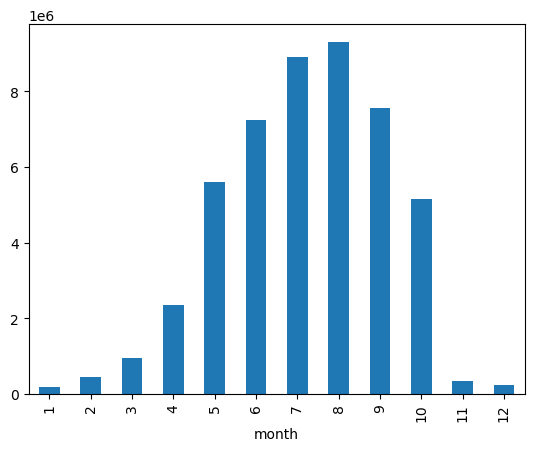

In [24]:
pernoctaciones_balears.groupby(by='month').pernoc_total.mean().plot.bar()

### Extranjeros

In [25]:
extranjeros_2024 = extranjeros[extranjeros.year==2024]

#### visitantes extranjeros  (2024)

In [26]:
extranjeros_2024.groupby(by="pais_origen").viajeros.sum().sort_values(ascending=False).to_frame()

,viajeros
pais_origen,
Total,116166159.0
Residentes en el Extranjero,61846788.0
Residentes en España,54319372.0
UE28 sin España,43143705.0
UE27_2020 sin España,31815931.0
Reino Unido,11327774.0
Alemania,7656443.0
Francia,6551945.0
América (sin EEUU),4725292.0


### visitantes extranjeros por año - países de origen

In [27]:
crosstab_viajeros_anyo_paisdeorigen = pd.crosstab(
    index=extranjeros['year'],
    columns=extranjeros['pais_origen'],
    values=extranjeros['viajeros'],
    aggfunc='sum',  # Aggregate values by sum
    dropna=False    # Optionally include NaN values
)

In [28]:
crosstab_viajeros_anyo_paisdeorigen

pais_origen,Alemania,América (sin EEUU),Asia (sin Japón),Austria,Bélgica,Dinamarca,Estados Unidos de América,Finlandia,Francia,Grecia,...,Residentes en el Extranjero,Resto de la U.E.,Resto del Mundo,Rusia,Suecia,Suiza,Total,UE27_2020 sin España,UE28 sin España,África
year,,,,,,,,,,,,,,,,,,,,,
2017,8014173.0,3308520.0,0.0,462232.0,1380339.0,667873.0,2778123.0,399256.0,5670976.0,121765.0,...,53340899.0,1132260.0,4484695.0,948463.0,1177333.0,1016002.0,103804067.0,0.0,37794134.0,749298.0
2018,7618230.0,3409769.0,0.0,479989.0,1392135.0,663395.0,2963006.0,432524.0,5901146.0,136688.0,...,54145755.0,1190238.0,4813449.0,957946.0,1200634.0,991623.0,105311465.0,0.0,37974307.0,765947.0
2019,7235631.0,3787740.0,0.0,496390.0,1371545.0,632117.0,3409343.0,414827.0,5950546.0,144348.0,...,55981859.0,1316965.0,5142627.0,1031642.0,1109947.0,954793.0,108716047.0,26722568.0,38262320.0,849257.0
2020,1239884.0,796371.0,0.0,76111.0,332664.0,127071.0,378960.0,100884.0,1637590.0,28107.0,...,10894256.0,374196.0,852143.0,142287.0,226195.0,156275.0,34589071.0,6035124.0,7623973.0,256720.0
2021,3085009.0,1293236.0,0.0,193786.0,783530.0,321066.0,871844.0,107588.0,3418911.0,53261.0,...,20451446.0,697598.0,762955.0,132069.0,376985.0,500148.0,60724132.0,13295891.0,15780808.0,324419.0
2022,6592065.0,3592968.0,0.0,480991.0,1383995.0,595536.0,3077786.0,310611.0,6030915.0,134287.0,...,49568084.0,1400133.0,2205164.0,28629.0,773892.0,946084.0,102882568.0,27028518.0,36615431.0,712779.0
2023,7238914.0,4444291.0,0.0,550661.0,1433062.0,608568.0,3952555.0,358542.0,6320146.0,162377.0,...,57283705.0,1662701.0,3231467.0,0.0,849900.0,1050567.0,111991772.0,29908021.0,40568390.0,810576.0
2024,7656443.0,4725292.0,0.0,586582.0,1538185.0,621969.0,4523050.0,377570.0,6551945.0,173551.0,...,61846788.0,1812267.0,3413578.0,0.0,864328.0,1107920.0,116166159.0,31815931.0,43143705.0,906977.0


In [29]:
paises_top = ["Reino Unido", "Francia", "Alemania","Estados Unidos de América", "América (sin EEUU)","Italia", "Países Bajos", "Portugal"]

In [30]:
crosstab_viajeros_paises_top = crosstab_viajeros_anyo_paisdeorigen[paises_top]

In [31]:
crosstab_viajeros_paises_top.to_csv("data/summaries/crosstab_viajeros_paises_top.csv")

### estancia media por pais de origen

In [32]:
extranjeros_2024.sort_values(by="estancia_media", ascending=False)

,periodo,pais_origen,viajeros,pernoctaciones,estancia_media,year,month,iso_date
7,2024M12,Finlandia,31260.0,209200.0,6.692258,2024,12,2024-12-01
339,2024M02,Noruega,44226.0,295299.0,6.677045,2024,2,2024-02-01
359,2024M01,Finlandia,34610.0,226174.0,6.534932,2024,1,2024-01-01
355,2024M01,Alemania,253218.0,1619813.0,6.396911,2024,1,2024-01-01
364,2024M01,Luxemburgo,3891.0,24692.0,6.345926,2024,1,2024-01-01
...,...,...,...,...,...,...,...,...
319,2024M03,Asia (sin Japón),NaN,NaN,NaN,2024,3,2024-03-01
341,2024M02,Rusia,NaN,NaN,NaN,2024,2,2024-02-01
351,2024M02,Asia (sin Japón),NaN,NaN,NaN,2024,2,2024-02-01
373,2024M01,Rusia,NaN,NaN,NaN,2024,1,2024-01-01


In [33]:
scatter_oportunidad_extranjeros_estancia_media = extranjeros_2024.groupby(by='pais_origen').agg({
    'viajeros':'sum',
    'estancia_media':'mean'
})

In [34]:
scatter_oportunidad_extranjeros_estancia_media

,viajeros,estancia_media
pais_origen,,
Alemania,7656443.0,5.621919
América (sin EEUU),4725292.0,2.384087
Asia (sin Japón),0.0,NaN
Austria,586582.0,4.098349
Bélgica,1538185.0,4.448071
Dinamarca,621969.0,4.953070
Estados Unidos de América,4523050.0,2.413044
Finlandia,377570.0,5.114521
Francia,6551945.0,2.930075


In [35]:
scatter_oportunidad_extranjeros_estancia_media.to_csv("data/summaries/scatter_extranjeros_estanciamedia.csv")

## Nacionales

In [36]:
nacionales_2024 = nacionales[nacionales.year==2024]

In [37]:
viajeros_cols = [col for col in nacionales_2024.columns if col.startswith('viajeros_')]
viajeros_cols

['viajeros_nacional',
 'viajeros_andalucia',
 'viajeros_aragon',
 'viajeros_asturias',
 'viajeros_balears',
 'viajeros_canarias',
 'viajeros_cantabria',
 'viajeros_castilla_leon',
 'viajeros_castilla_mancha',
 'viajeros_cataluña',
 'viajeros_valencia',
 'viajeros_extremadura',
 'viajeros_galicia',
 'viajeros_madrid',
 'viajeros_murcia',
 'viajeros_navarra',
 'viajeros_pais_vasco',
 'viajeros_rioja',
 'viajeros_ceuta',
 'viajeros_melilla']

In [38]:
# Agrupar por zona y para cada grupo encontrar las 5 columnas con valores más altos
def get_top_5(group):
    # Seleccionar solo columnas de viajeros
    viajeros_data = group[viajeros_cols]
    # Calcular la media por columna y obtener las 5 mayores
    top_5 = viajeros_data.mean().nlargest(6)
    return top_5

top_5_por_zona = nacionales_2024.groupby('zona').apply(get_top_5)

/tmp/ipykernel_39977/492539224.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_por_zona = nacionales_2024.groupby('zona').apply(get_top_5)


In [39]:
top_5_por_zona

zona                                          
07 Balears, Illes     viajeros_nacional           100.000000
                      viajeros_balears             37.066667
                      viajeros_madrid              17.844167
                      viajeros_cataluña            14.453333
                      viajeros_andalucia            8.084167
                      viajeros_valencia             6.655000
08 Barcelona          viajeros_nacional           100.000000
                      viajeros_cataluña            44.300000
                      viajeros_madrid              21.939167
                      viajeros_andalucia            6.612500
                      viajeros_valencia             6.169167
                      viajeros_pais_vasco           3.617500
17 Girona             viajeros_nacional           100.000000
                      viajeros_cataluña            79.668333
                      viajeros_madrid               6.456667
                      viajeros_valenci

In [40]:
nacionales_2024.head(10)

,periodos,zona,viajeros_nacional,viajeros_andalucia,viajeros_aragon,viajeros_asturias,viajeros_balears,viajeros_canarias,viajeros_cantabria,viajeros_castilla_leon,...,pernoc_navarra,pernoc_paisvasco,pernoc_rioja,pernoc_ceuta,pernoc_melilla,provincia_simp,id,year,month,iso_date
0,2024M12,29 Málaga,100,59.49,0.83,0.87,2.57,1.33,0.58,2.17,...,0.58,3.00,0.26,1.40,0.47,Málaga,2024M12_Málaga,2024,12,2024-12-01
1,2024M12,41 Sevilla,100,43.92,1.34,1.03,1.68,2.25,0.84,4.36,...,0.97,1.82,0.48,0.51,0.12,Sevilla,2024M12_Sevilla,2024,12,2024-12-01
2,2024M12,"07 Balears, Illes",100,5.25,0.61,0.45,47.74,0.77,0.17,1.18,...,0.49,1.31,0.14,0.34,0.05,Illes Balears,2024M12_Illes Balears,2024,12,2024-12-01
3,2024M12,08 Barcelona,100,6.48,2.92,0.75,2.85,1.62,0.54,1.89,...,1.10,3.44,0.64,0.40,0.03,Barcelona,2024M12_Barcelona,2024,12,2024-12-01
4,2024M12,17 Girona,100,2.01,0.89,0.21,1.52,0.26,0.31,0.36,...,0.12,0.67,0.03,0.05,0.00,Girona,2024M12_Girona,2024,12,2024-12-01
5,2024M12,46 Valencia/València,100,12.00,2.68,0.76,2.55,1.38,0.46,2.41,...,0.71,2.51,0.30,0.40,0.04,Valencia,2024M12_Valencia,2024,12,2024-12-01
6,2024M12,28 Madrid,100,14.60,2.51,2.96,2.66,3.75,2.00,5.68,...,1.68,4.42,0.84,0.42,0.14,Madrid,2024M12_Madrid,2024,12,2024-12-01
7,2024M11,29 Málaga,100,50.45,0.63,0.68,2.36,1.22,0.41,1.39,...,0.47,2.73,0.33,1.01,0.95,Málaga,2024M11_Málaga,2024,11,2024-11-01
8,2024M11,41 Sevilla,100,38.52,1.64,1.27,1.84,1.82,1.30,3.64,...,0.80,2.13,0.72,0.44,0.07,Sevilla,2024M11_Sevilla,2024,11,2024-11-01
9,2024M11,"07 Balears, Illes",100,4.73,0.69,0.71,39.01,1.99,0.28,2.17,...,0.39,1.66,0.18,0.53,0.03,Illes Balears,2024M11_Illes Balears,2024,11,2024-11-01


In [41]:
pernoctaciones.head(8)

,periodo,provincia,viajeros_total,viajeros_esp,viajeros_ext,pernoc_total,pernoc_esp,pernoc_ext,provincia_simp,id,estancia_media_total,estancia_media_esp,estancia_media_ext,year,month,iso_date
0,2024M12,29 Málaga,292142,120096,172046,894297,247630,646667,Málaga,2024M12_Málaga,3.061172,2.061934,3.758687,2024,12,2024-12-01
1,2024M12,41 Sevilla,291612,154675,136937,584318,281149,303169,Sevilla,2024M12_Sevilla,2.003752,1.817676,2.213930,2024,12,2024-12-01
2,2024M12,"07 Balears, Illes",102526,39500,63026,311450,84821,226629,Illes Balears,2024M12_Illes Balears,3.037766,2.147367,3.595802,2024,12,2024-12-01
3,2024M12,08 Barcelona,830151,275949,554202,1900241,485475,1414766,Barcelona,2024M12_Barcelona,2.289031,1.759292,2.552798,2024,12,2024-12-01
4,2024M12,17 Girona,152175,91881,60294,252605,149407,103198,Girona,2024M12_Girona,1.659964,1.626092,1.711580,2024,12,2024-12-01
5,2024M12,46 Valencia/València,206102,122489,83613,448045,248618,199427,Valencia,2024M12_Valencia,2.173899,2.029717,2.385120,2024,12,2024-12-01
6,2024M12,28 Madrid,1058633,606856,451778,2165912,1121901,1044011,Madrid,2024M12_Madrid,2.045952,1.848710,2.310894,2024,12,2024-12-01
7,2024M11,29 Málaga,364981,139834,225148,1167219,268510,898709,Málaga,2024M11_Málaga,3.198027,1.920205,3.991637,2024,11,2024-11-01


### viajeros nacionales absolutos

#### 2027-2024 solo ciudades staySpain

In [42]:
pernoctaciones.columns

Index(['periodo', 'provincia', 'viajeros_total', 'viajeros_esp',
       'viajeros_ext', 'pernoc_total', 'pernoc_esp', 'pernoc_ext',
       'provincia_simp', 'id', 'estancia_media_total', 'estancia_media_esp',
       'estancia_media_ext', 'year', 'month', 'iso_date'],
      dtype='object')

In [43]:
pernoctaciones_simp = pernoctaciones[["id", "pernoc_total"]]

In [44]:
merge_nacionales_pernoctaciones = nacionales.merge(pernoctaciones_simp, on='id')

In [45]:
merge_nacionales_pernoctaciones.columns

Index(['periodos', 'zona', 'viajeros_nacional', 'viajeros_andalucia',
       'viajeros_aragon', 'viajeros_asturias', 'viajeros_balears',
       'viajeros_canarias', 'viajeros_cantabria', 'viajeros_castilla_leon',
       'viajeros_castilla_mancha', 'viajeros_cataluña', 'viajeros_valencia',
       'viajeros_extremadura', 'viajeros_galicia', 'viajeros_madrid',
       'viajeros_murcia', 'viajeros_navarra', 'viajeros_pais_vasco',
       'viajeros_rioja', 'viajeros_ceuta', 'viajeros_melilla',
       'pernoc_total_nacional', 'pernoc_andalucia', 'pernoc_aragon',
       'pernoc_asturias', 'pernoc_balears', 'pernoc_canarias',
       'pernoc_cantabria', 'pernoc_castilla_leon', 'pernoc_castilla_mancha',
       'pernoc_cataluña', 'pernoc_valencia', 'pernoc_extremadura',
       'pernoc_galicia', 'pernoc_madrid', 'pernoc_murcia', 'pernoc_navarra',
       'pernoc_paisvasco', 'pernoc_rioja', 'pernoc_ceuta', 'pernoc_melilla',
       'provincia_simp', 'id', 'year', 'month', 'iso_date', 'pernoc_total'],
 

In [46]:
pernoctaciones_2017_2024_staySpain = merge_nacionales_pernoctaciones[['year', 'pernoc_total', 'pernoc_andalucia', 'pernoc_balears', 'pernoc_cataluña', 'pernoc_valencia', 'pernoc_madrid']]

In [47]:
# Identify columns that start with 'viajeros_'
pernoc_columns = [col for col in pernoctaciones_2017_2024_staySpain.columns if col.startswith('pernoc_')]

# Multiply 'viajeros_esp' with each of the identified columns and create new columns
for col in pernoc_columns:
    pernoctaciones_2017_2024_staySpain[col + '_abs'] = pernoctaciones_2017_2024_staySpain['pernoc_total'] * pernoctaciones_2017_2024_staySpain[col] / 100

/tmp/ipykernel_39977/286128313.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pernoctaciones_2017_2024_staySpain[col + '_abs'] = pernoctaciones_2017_2024_staySpain['pernoc_total'] * pernoctaciones_2017_2024_staySpain[col] / 100
/tmp/ipykernel_39977/286128313.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pernoctaciones_2017_2024_staySpain[col + '_abs'] = pernoctaciones_2017_2024_staySpain['pernoc_total'] * pernoctaciones_2017_2024_staySpain[col] / 100
/tmp/ipykernel_39977/286128313.py:6: SettingWi

In [48]:
pernoctaciones_2017_2024_staySpain = pernoctaciones_2017_2024_staySpain.groupby(by='year').sum()

In [49]:
pernoctaciones_2017_2024_staySpain = pernoctaciones_2017_2024_staySpain[['pernoc_andalucia_abs', 'pernoc_balears_abs', 'pernoc_cataluña_abs',
       'pernoc_valencia_abs', 'pernoc_madrid_abs']]

In [50]:
pernoctaciones_2017_2024_staySpain.to_csv("data/summaries/pernoctaciones_2017_2024_ciudades_staySpain.csv")

#### crosstab pernoc_total por año y provincia simplificada

In [51]:
total_pernoctaciones_por_ciudad_2017_2024  = pd.crosstab(
    index=pernoctaciones['year'],
    columns=pernoctaciones['provincia_simp'],
    values=pernoctaciones['pernoc_total'],
    aggfunc='sum'
)

In [52]:
total_pernoctaciones_por_ciudad_2017_2024

provincia_simp,Barcelona,Girona,Illes Balears,Madrid,Málaga,Sevilla,Valencia
year,,,,,,,
2017,32197097,12079327,59375939,24004619,19942144,6465248,7212730
2018,32089093,12139126,59173693,24533802,19830952,6855782,7741708
2019,33452948,12404950,58118938,25655626,20373670,7288638,8025587
2020,6724605,3471355,5963669,7431827,5384627,2114277,2665868
2021,12906011,6528091,25818297,12622936,10748639,3460715,4834138
2022,30250195,11248452,55499026,22205378,19430591,6635950,7925785
2023,33752627,12398914,59042373,25269790,21438094,7464999,8414008
2024,34629950,12759295,63040602,26780945,22049260,7937339,8836969


In [53]:
total_pernoctaciones_por_ciudad_2017_2024.to_csv("data/summaries/total_pernoctaciones_por_ciudad_2017_2024.csv")

#### 2024

In [54]:
pernoctaciones_2024 = pernoctaciones[pernoctaciones.year == 2024]

In [55]:
nacionales_2024 = nacionales[nacionales.year == 2024]

In [56]:
viajeros_abs_esp_2024 = pernoctaciones_2024[["id", "viajeros_esp"]].reset_index(drop=True)

In [57]:
nacionales_con_absolutos_2024 = nacionales_2024.merge(viajeros_abs_esp_2024, on='id')

In [58]:
viajeros_nacionales_absolutos_mensual_2024 = nacionales_con_absolutos_2024[[
       'provincia_simp', 'viajeros_esp', 'viajeros_andalucia',
       'viajeros_aragon', 'viajeros_asturias', 'viajeros_balears',
       'viajeros_canarias', 'viajeros_cantabria', 'viajeros_castilla_leon',
       'viajeros_castilla_mancha', 'viajeros_cataluña', 'viajeros_valencia',
       'viajeros_extremadura', 'viajeros_galicia', 'viajeros_madrid',
       'viajeros_murcia', 'viajeros_navarra', 'viajeros_pais_vasco',
       'viajeros_rioja', 'viajeros_ceuta', 'viajeros_melilla',
]]

In [59]:
# Identify columns that start with 'viajeros_'
viajeros_columns = [col for col in viajeros_nacionales_absolutos_mensual_2024.columns if col.startswith('viajeros_')]

# Multiply 'viajeros_esp' with each of the identified columns and create new columns
for col in viajeros_columns:
    viajeros_nacionales_absolutos_mensual_2024[col + '_abs'] = viajeros_nacionales_absolutos_mensual_2024['viajeros_esp'] * viajeros_nacionales_absolutos_mensual_2024[col] / 100

/tmp/ipykernel_39977/3431893196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viajeros_nacionales_absolutos_mensual_2024[col + '_abs'] = viajeros_nacionales_absolutos_mensual_2024['viajeros_esp'] * viajeros_nacionales_absolutos_mensual_2024[col] / 100
/tmp/ipykernel_39977/3431893196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viajeros_nacionales_absolutos_mensual_2024[col + '_abs'] = viajeros_nacionales_absolutos_mensual_2024['viajeros_esp'] * viajeros_nacionales_absolutos_mensual_2024[col] / 

In [60]:
viajeros_nacionales_absolutos_mensual_2024 = viajeros_nacionales_absolutos_mensual_2024[[
        'provincia_simp', 'viajeros_andalucia_abs', 'viajeros_aragon_abs',
       'viajeros_asturias_abs', 'viajeros_balears_abs',
       'viajeros_canarias_abs', 'viajeros_cantabria_abs',
       'viajeros_castilla_leon_abs', 'viajeros_castilla_mancha_abs',
       'viajeros_cataluña_abs', 'viajeros_valencia_abs',
       'viajeros_extremadura_abs', 'viajeros_galicia_abs',
       'viajeros_madrid_abs', 'viajeros_murcia_abs', 'viajeros_navarra_abs',
       'viajeros_pais_vasco_abs', 'viajeros_rioja_abs', 'viajeros_ceuta_abs',
       'viajeros_melilla_abs']]

In [61]:
viajeros_nacionales_absolutos_2024 = viajeros_nacionales_absolutos_mensual_2024.groupby(by="provincia_simp").sum()

In [62]:
viajeros_nacionales_absolutos_2024.to_csv("data/summaries/viajeros_nacionales_absolutos.csv")

#### viajeros nacionales absolutos long form

In [63]:
viajeros_nacionales_absolutos_2024

,viajeros_andalucia_abs,viajeros_aragon_abs,viajeros_asturias_abs,viajeros_balears_abs,viajeros_canarias_abs,viajeros_cantabria_abs,viajeros_castilla_leon_abs,viajeros_castilla_mancha_abs,viajeros_cataluña_abs,viajeros_valencia_abs,viajeros_extremadura_abs,viajeros_galicia_abs,viajeros_madrid_abs,viajeros_murcia_abs,viajeros_navarra_abs,viajeros_pais_vasco_abs,viajeros_rioja_abs,viajeros_ceuta_abs,viajeros_melilla_abs
provincia_simp,,,,,,,,,,,,,,,,,,,
Barcelona,2.229472e+05,83515.8791,26247.9227,81666.7261,51268.8378,20687.6346,57507.0175,55234.8506,1.492946e+06,207743.6631,23535.0117,81668.9801,7.378735e+05,34945.5899,36237.4779,122410.3941,17487.5950,9679.3267,5106.4243
Girona,2.968963e+04,21718.0404,5597.2789,17275.8738,6996.5695,4618.2889,14342.4174,13181.4698,1.350141e+06,49563.2376,4832.6683,14603.1500,1.114211e+05,8952.2191,8337.6787,36740.7343,3413.9243,837.4679,610.5798
Illes Balears,1.368372e+05,20047.3872,22129.3726,559133.4065,20503.6323,12009.3358,32745.5405,22271.1177,2.361153e+05,109369.2887,11948.7927,44680.6412,2.914225e+05,17714.0603,11706.5897,48574.7322,5280.0907,5568.3658,1316.6440
Madrid,9.150357e+05,160677.2919,176911.0126,154030.1162,230362.0705,121076.1911,318864.3767,227659.6011,9.049322e+05,589197.7479,166989.8223,324362.5365,1.677174e+06,191002.3906,101960.8143,292438.1117,60295.9413,28320.8763,13707.8207
Málaga,1.155910e+06,16457.6654,17849.3827,64668.6369,24023.9785,11832.3550,44106.5681,66521.2036,1.460285e+05,70529.5486,48351.7683,45781.0258,3.979466e+05,31755.5021,10627.2607,55282.3942,5093.0636,22965.2764,24722.0916
Sevilla,7.193251e+05,23515.3467,19788.7335,23677.0497,37302.8824,19589.3204,57950.0208,52795.4517,1.315406e+05,80601.0594,70005.1429,40618.7341,3.557944e+05,30112.7441,12592.7699,41190.0168,9269.6802,8664.8366,1493.3122
Valencia,2.349809e+05,53851.8960,16748.7676,40699.9015,17856.4366,9981.1440,63472.4768,106718.0449,2.309014e+05,463005.5785,16944.4933,34556.4156,5.628605e+05,68321.6417,15178.6882,52463.5418,8777.7221,12107.0712,870.8568


In [64]:
viajeros_absolutos_melt = viajeros_nacionales_absolutos_2024.reset_index().melt(id_vars='provincia_simp', var_name='origen', value_name='viajeros')

In [65]:
# viajeros_absolutos_melt['origen'] = viajeros_absolutos_melt['origen'].str.split('_').str[1]

viajeros_absolutos_melt['origen'] = viajeros_absolutos_melt['origen'].str.replace(r'viajeros_(.+?)_abs', r'\1', regex=True)

In [66]:
viajeros_absolutos_melt.to_csv("data/summaries/viajeros_nacionales_absolutos_melt.csv")

In [67]:
viajeros_absolutos_top5origenes = (
    viajeros_absolutos_melt.sort_values('viajeros', ascending=False)  # Sort by viajeros
    .groupby('provincia_simp')  # Group by provincia_simp
    .head(5)  # Keep only the first 5 entries per group
    .reset_index(drop=True)  # Reset the DataFrame index
)

In [68]:
viajeros_absolutos_top5origenes.sort_values(by=['provincia_simp', 'viajeros']).to_csv("data/summaries/viajeros_absolutos_top5origenes.csv")